<a href="https://colab.research.google.com/github/Zhaoxin-Hu/ECE222A/blob/master/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(suppress=True)

from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.axes3d as axes3d

import sympy as sp

from scipy import special
from scipy import integrate
from scipy.signal import argrelextrema

## Problem 1

### Part a

In [0]:
N = 64
dz = 0.5 # *wvlen
k = 2*np.pi # /wvlen

num_pts_theta = 200
theta = np.linspace(0, np.pi, num_pts_theta)

In [0]:
def AF_un(theta, phi):
    psiz = k*dz*np.cos(theta)
    AFz = 0
    for n in np.arange(N):
        AFz = AFz + np.exp(1j*n*psiz)
    return np.abs(AFz)
  
AF_un_max = AF_un(theta, 0).max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

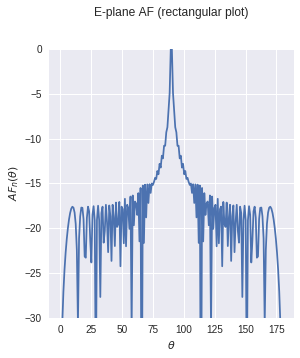

In [0]:
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, np.pi/2)))
else:
    ax.plot(theta/np.pi*180, 10*np.log10(AF_n(theta, np.pi/2)))
    ax.set_ylim(-30, 0)
ax.set_title(r'E-plane AF (rectangular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$AF_n(\theta)$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

In [0]:
# HPBW in E-plane
num_pts_theta = 500
theta = np.linspace(0, np.pi, num_pts_theta)
ind1_E = np.where(10*np.log10(AF_n(theta, np.pi/2))>-3)[0][0]
ind2_E = np.where(10*np.log10(AF_n(theta, np.pi/2))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

E-plane 3dB beamwidth =  1.8


In [0]:
# peaks and nulls in the E-plane
num_pts_theta = 500
theta = np.linspace(0, np.pi, num_pts_theta)
max_ind = argrelextrema(AF_n(theta,0), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(AF_n(angles,0)))

min_ind = argrelextrema(AF_n(theta,0), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

### Part b

In [0]:
N = 16
NE = 4
dz = 2 # *wvlen
dzE = 0.5 # *wvlen
k = 2*np.pi # /wvlen

num_pts_theta = 200
theta = np.linspace(0, np.pi, num_pts_theta)

In [0]:
def AF1_un(theta, phi):
    psiz = k*dz*np.cos(theta)
    AFz = 0
    for n in np.arange(N):
        AFz = AFz + np.exp(1j*n*psiz)
    return np.abs(AFz)
  
AF1_un_max = AF1_un(theta, 0).max()
  
def AF1_n(theta, phi):
    return AF1_un(theta, phi)/AF1_un_max
  
def EF_un(theta, phi):
    psiz = k*dzE*np.cos(theta)
    EFz = 0
    for n in np.arange(NE):
        EFz = EFz + np.exp(1j*n*psiz)
    return np.abs(EFz)
  
EF_un_max = EF_un(theta, 0).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max
  
def AF_un(theta, phi):
    return np.abs(AF1_un(theta, phi)*EF_un(theta, phi))
  
AF_un_max = AF_un(theta, 0).max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

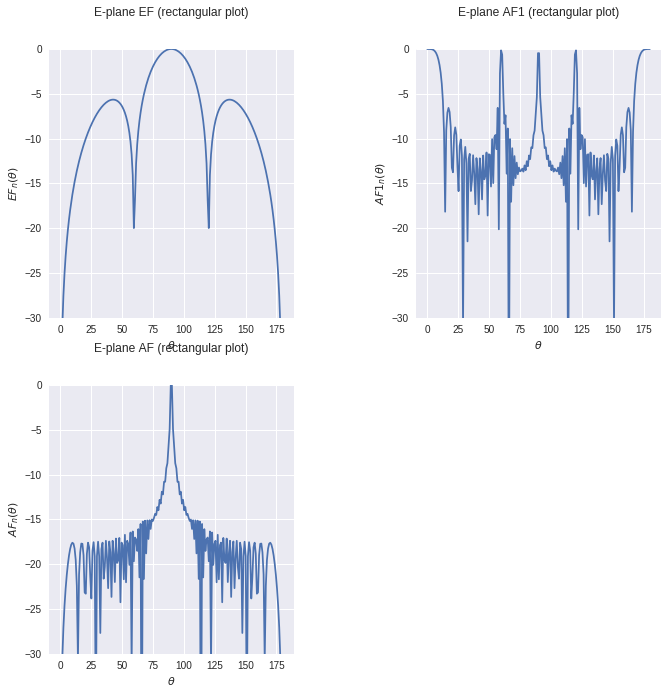

In [0]:
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, np.pi/2)))
else:
    ax.plot(theta/np.pi*180, 10*np.log10(EF_n(theta, np.pi/2)))
    ax.set_ylim(-30, 0)
ax.set_title(r'E-plane EF (rectangular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$EF_n(\theta)$')

ax = plt.subplot(222)
if scale == 'lin':
    ax.plot(theta, (AF1_n(theta, np.pi/2)))
else:
    ax.plot(theta/np.pi*180, 10*np.log10(AF1_n(theta, np.pi/2)))
    ax.set_ylim(-30, 0)
ax.set_title(r'E-plane AF1 (rectangular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$AF1_n(\theta)$')


ax = plt.subplot(223)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, np.pi/2)))
else:
    ax.plot(theta/np.pi*180, 10*np.log10(AF_n(theta, np.pi/2)))
    ax.set_ylim(-30, 0)
ax.set_title(r'E-plane AF (rectangular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$AF_n(\theta)$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

### Part c

In [0]:
N = 8
NE = 8
dz = 4 # *wvlen
dzE = 0.5 # *wvlen
k = 2*np.pi # /wvlen

num_pts_theta = 200
theta = np.linspace(0, np.pi, num_pts_theta)

In [0]:
def AF1_un(theta, phi):
    psiz = k*dz*np.cos(theta)
    AFz = 0
    for n in np.arange(N):
        AFz = AFz + np.exp(1j*n*psiz)
    return np.abs(AFz)
  
AF1_un_max = AF1_un(theta, 0).max()
  
def AF1_n(theta, phi):
    return AF1_un(theta, phi)/AF1_un_max
  
def EF_un(theta, phi):
    psiz = k*dzE*np.cos(theta)
    EFz = 0
    for n in np.arange(NE):
        EFz = EFz + np.exp(1j*n*psiz)
    return np.abs(EFz)
  
EF_un_max = EF_un(theta, 0).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max
  
def AF_un(theta, phi):
    return np.abs(AF1_un(theta, phi)*EF_un(theta, phi))
  
AF_un_max = AF_un(theta, 0).max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

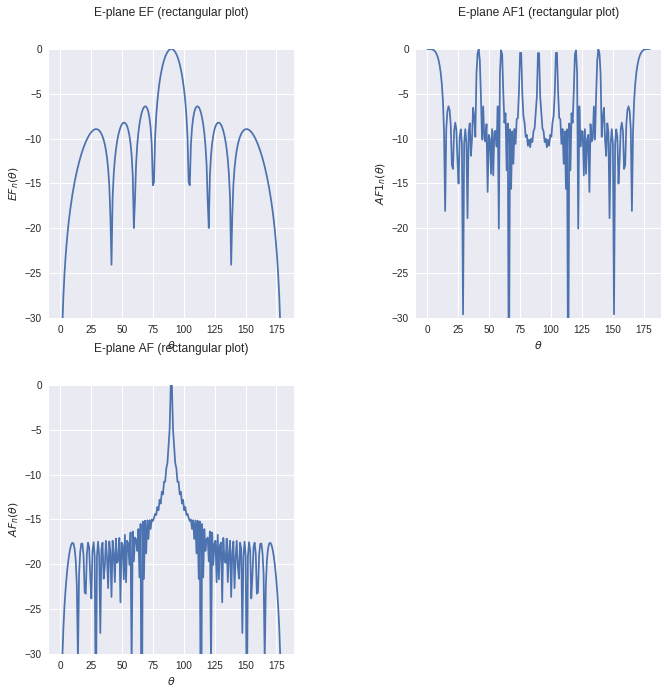

In [0]:
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, np.pi/2)))
else:
    ax.plot(theta/np.pi*180, 10*np.log10(EF_n(theta, np.pi/2)))
    ax.set_ylim(-30, 0)
ax.set_title(r'E-plane EF (rectangular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$EF_n(\theta)$')

ax = plt.subplot(222)
if scale == 'lin':
    ax.plot(theta, (AF1_n(theta, np.pi/2)))
else:
    ax.plot(theta/np.pi*180, 10*np.log10(AF1_n(theta, np.pi/2)))
    ax.set_ylim(-30, 0)
ax.set_title(r'E-plane AF1 (rectangular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$AF1_n(\theta)$')


ax = plt.subplot(223)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, np.pi/2)))
else:
    ax.plot(theta/np.pi*180, 10*np.log10(AF_n(theta, np.pi/2)))
    ax.set_ylim(-30, 0)
ax.set_title(r'E-plane AF (rectangular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$AF_n(\theta)$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

### Part d

In [4]:
# in (b), the grating lobes are at
k = 2*np.pi # /wvlen
dz = 2 # *wvlen
theta0 = np.deg2rad(80)
psiz = np.array([-4*np.pi, -2*np.pi, 2*np.pi])
alphaz = -k*dz*np.cos(theta0)
grating_lobes = np.rad2deg(np.arccos((psiz-alphaz)/(k*dz)))
print(grating_lobes)

# in (c), the grating lobes are at
k = 2*np.pi # /wvlen
dz = 4 # *wvlen
theta0 = np.deg2rad(80)
psiz = np.pi*np.array([-8, -6, -4, -2, 2, 4, 6])
alphaz = -k*dz*np.cos(theta0)
grating_lobes = np.rad2deg(np.arccos((psiz-alphaz)/(k*dz)))
print(grating_lobes)

[145.72578562 109.04749486  47.65073878]
[145.72578562 125.19435621 109.04749486  94.37889876  64.93487258
  47.65073878  22.53461346]


## Problem 2

Antenna Size ($2^n \times 2^n$)

In [0]:
# directivity
n = np.array([1, 2, 3, 4, 5])
Ap = (2**n)**2
D = 4*np.pi*Ap
D_dB = 10*np.log10(D)
print('D (dB): ', D_dB)

# efficiency (loss)
freq = 3e9
c = 3e8
n = 1
wvlen = c/freq*1e2 # in cm
loss_per_cm = 0.1
loss_factor = 0
for i in range(n):
    loss_factor = loss_factor + 2*2**(i-1)*wvlen*loss_per_cm
print(loss_factor)

D (dB):  [17.01269855 23.03329847 29.05389838 35.07449829 41.09509821]
1.0


## Problem 3

### Part 2

In [0]:
er = 4
b = 0.5/np.sqrt(er)
a = 1.5*b
dx = a
dy = b
k = 2*np.pi

num_pts_theta = 200
num_pts_phi = 200
theta, phi = np.linspace(0, np.pi/2, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)

In [0]:
def AF_un(theta, phi):
    psiy = k*dy*np.sin(theta)*np.sin(phi)
    AFy = 1 + np.exp(1j*psiy)
    return np.abs(AFy)
  
AF_un_max = AF_un(theta2d, phi2d).max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

def EF_un(theta, phi):
    psix = k*dx*np.sin(theta)*np.cos(phi)
    return np.abs(np.sqrt(np.sin(phi)**2+(np.cos(theta)*np.cos(phi))**2)*np.sinc(psix/(2*np.pi))) # note that python def is sin(pi*x)/(pi*x)
  
EF_un_max = EF_un(theta2d, phi2d).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max

def P_un(theta, phi):
    return (AF_un(theta, phi)*EF_un(theta,phi))**2
  
P_un_max = P_un(theta2d, phi2d).max()

def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

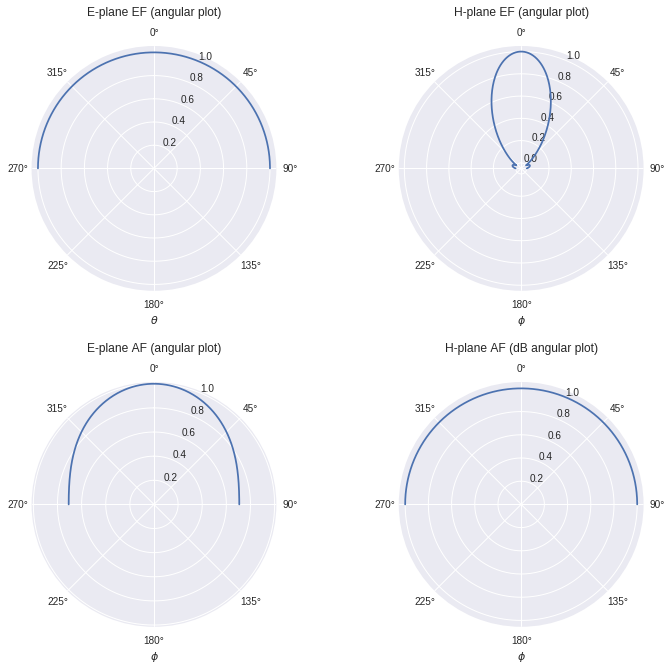

In [0]:
scale = 'lin'
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane AF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane AF (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

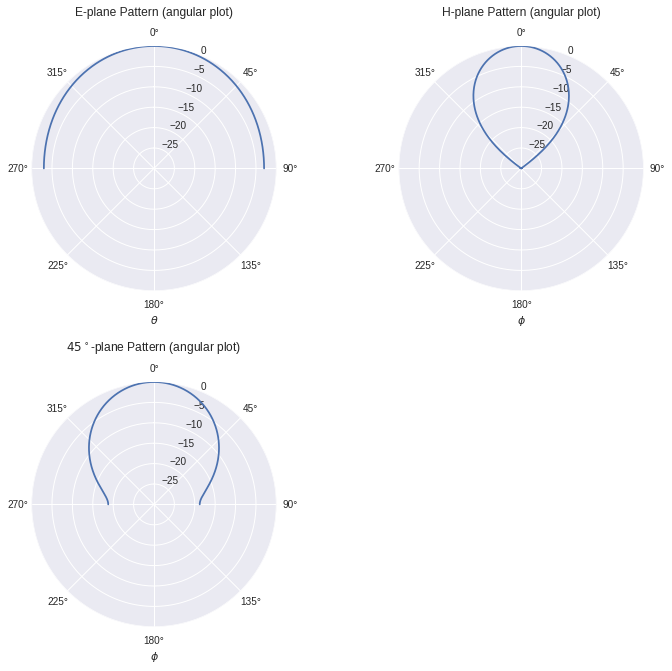

In [0]:
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/2)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, 0)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/4)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/4)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'$45^\circ$-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

In [0]:
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi/2)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  1.66
directivity =  7.55
directivity (dB) =  8.78


### Part 3

In [0]:
er = 4
b = 0.5/np.sqrt(er) # *wvlen in air
a = 1.5*b
k = 2*np.pi # /wvlen in air
ky = np.pi/b # /wvlen in air

num_pts_theta = 200
num_pts_phi = 200
theta, phi = np.linspace(0, np.pi/2, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)

In [0]:
def AF_un(theta, phi):
    psix = k*a*np.sin(theta)*np.cos(phi)
    AFx = 1 - np.exp(1j*psix)
    return np.abs(AFx)
  
AF_un_max = AF_un(theta2d, phi2d).max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

def EF_un(theta, phi):
    psiy = k*b*np.sin(theta)*np.sin(phi)
    num = ky*np.cos(0.5*ky*b)*np.sin(0.5*psiy)-k*np.sin(theta)*np.sin(phi)*np.sin(0.5*ky*b)*np.cos(0.5*psiy)
    den = (k*np.sin(theta)*np.sin(phi))**2-ky**2
    return np.abs(num/den)
  
EF_un_max = EF_un(theta2d, phi2d).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max

def P_un(theta, phi):
    return (AF_un(theta, phi)*EF_un(theta,phi))**2
  
P_un_max = P_un(theta2d, phi2d).max()

def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


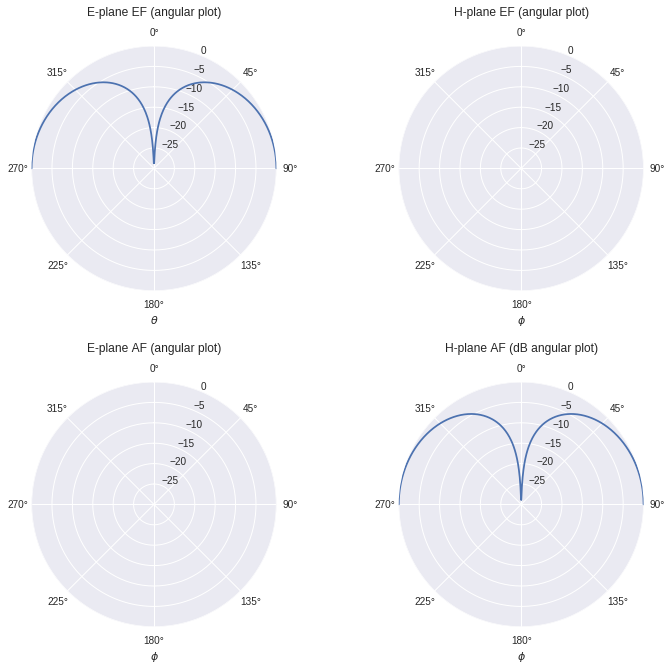

In [0]:
scale = 'dB'
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane AF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane AF (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


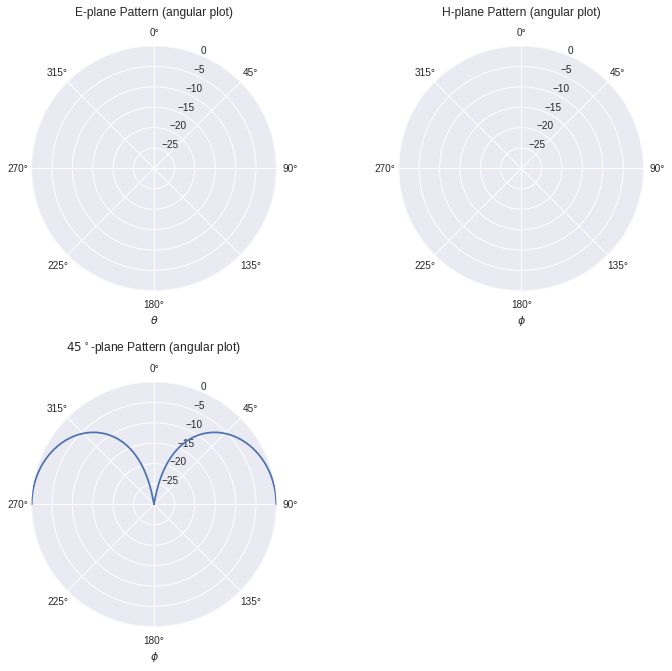

In [0]:
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/2)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, 0)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/4)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/4)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'$45^\circ$-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

## Problem 4

### Part a

In [0]:
b = 4 # *wvlen in air
a = 6 # *wvlen in air
dx = a
dy = b
k = 2*np.pi # /wvlen in air

num_pts_theta = 200
num_pts_phi = 200
theta, phi = np.linspace(0, np.pi/2, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)

In [0]:
def AF_un(theta, phi):
    psix = k*dx*np.sin(theta)*np.cos(phi)
    psiy = k*dy*np.sin(theta)*np.sin(phi)
    AFx = np.cos(0.5*psix)/(np.pi**2-psix**2)
    AFy = np.sinc(0.5*psiy/np.pi)
    return np.abs(AFx*AFy)
  
AF_un_max = AF_un(theta2d, phi2d).max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

def EF_un(theta, phi):
    return np.abs(np.sqrt(np.sin(phi)**2+(np.cos(theta)*np.cos(phi))**2))
  
EF_un_max = EF_un(theta2d, phi2d).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max

def P_un(theta, phi):
    return (AF_un(theta, phi)*EF_un(theta,phi))**2
  
P_un_max = P_un(theta2d, phi2d).max()

def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

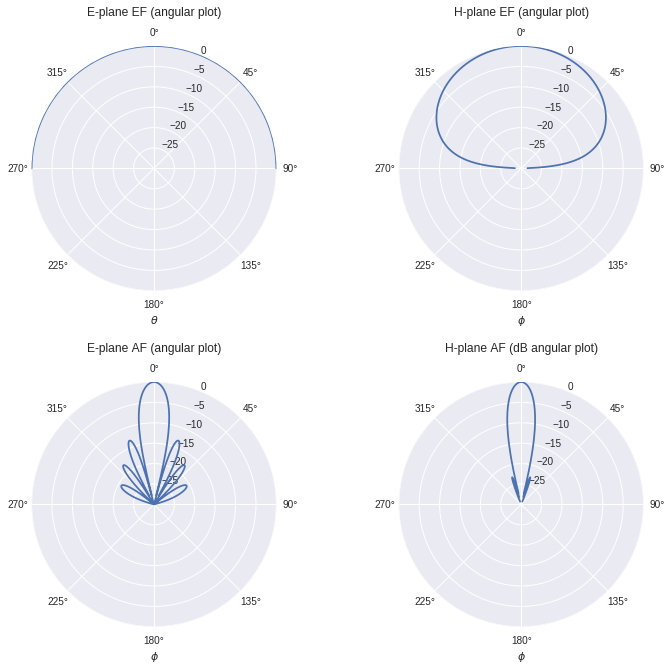

In [0]:
scale = 'dB'
num_pts_theta = 500
theta = np.linspace(-np.pi, np.pi, num_pts_theta)

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane AF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane AF (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

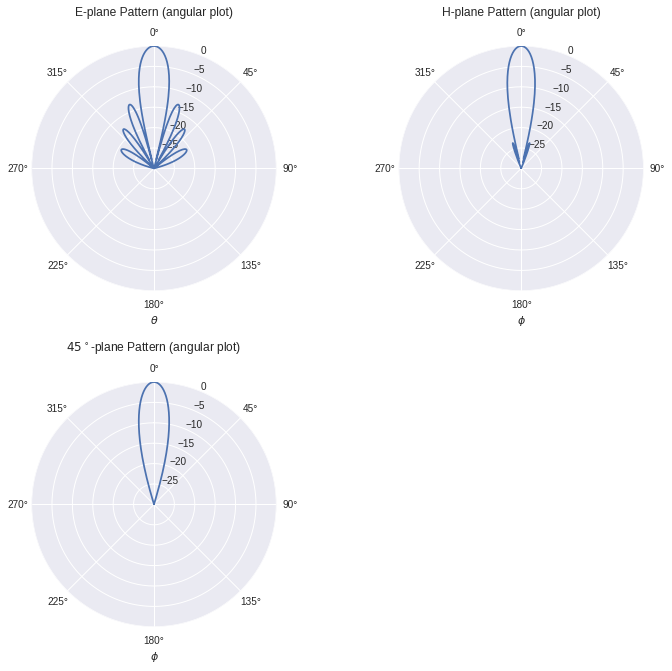

In [0]:
num_pts_theta = 500
theta = np.linspace(-np.pi, np.pi, num_pts_theta)
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/2)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, 0)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/4)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/4)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'$45^\circ$-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

In [0]:
# directivity
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi/2)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  0.05
directivity =  246.27
directivity (dB) =  23.91


In [0]:
# HPBW
# E-plane
ind1_E = np.where(10*np.log10(P_n(theta, np.pi/2))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n(theta, np.pi/2))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

# H-plane
ind1_H = np.where(10*np.log10(P_n(theta, 0))>-3)[0][0]
ind2_H = np.where(10*np.log10(P_n(theta, 0))>-3)[0][-1]
BW_3dB_H = (theta[ind2_H] - theta[ind1_H])/np.pi*180 # degrees
print('H-plane 3dB beamwidth = ', round(BW_3dB_H,2))

# H-plane
ind1_45 = np.where(10*np.log10(P_n(theta, np.pi/4))>-3)[0][0]
ind2_45 = np.where(10*np.log10(P_n(theta, np.pi/4))>-3)[0][-1]
BW_3dB_45 = (theta[ind2_45] - theta[ind1_45])/np.pi*180 # degrees
print('45 deg-plane 3dB beamwidth = ', round(BW_3dB_45,2))

E-plane 3dB beamwidth =  12.63
H-plane 3dB beamwidth =  11.18
45 deg-plane 3dB beamwidth =  11.9


### Part c

In [0]:
a = 3 # *wvlen in air
k = 2*np.pi # /wvlen in air

num_pts_theta = 200
num_pts_phi = 200
theta, phi = np.linspace(0, np.pi/2, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)

In [0]:
def AF_un(theta, phi):
    psir = k*a*np.sin(theta)
    return np.abs(special.jv(1,psir)/psir)

AF_unnorm = AF_un(theta2d, phi2d)
AF_unnorm[np.isnan(AF_unnorm)] = 0.5  
AF_un_max = AF_unnorm.max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

def EF_un(theta, phi):
    return np.abs(np.sqrt(np.sin(phi)**2+(np.cos(theta)*np.cos(phi))**2))
  
EF_un_max = EF_un(theta2d, phi2d).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max

def P_un(theta, phi):
    return (AF_un(theta, phi)*EF_un(theta,phi))**2
  
P_unnorm = P_un(theta2d, phi2d)
P_unnorm[np.isnan(P_unnorm)] = 0.25  
P_un_max = P_unnorm.max()

def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


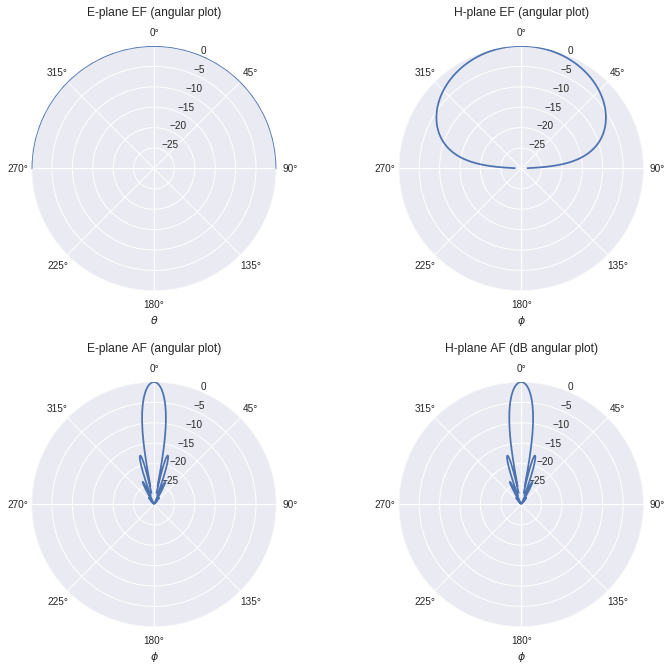

In [0]:
scale = 'dB'
num_pts_theta = 500
theta = np.linspace(-np.pi, np.pi, num_pts_theta)

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
AF_norm = AF_n(theta, np.pi/2)
AF_norm[np.isnan(AF_norm)] = 1  
if scale == 'lin':
    ax.plot(theta, (AF_norm))
else:
    ax.plot(theta, 20*np.log10(AF_norm))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane AF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
AF_norm = AF_n(theta, 0)
AF_norm[np.isnan(AF_norm)] = 1
if scale == 'lin':
    ax.plot(theta, (AF_norm))
else:
    ax.plot(theta, 20*np.log10(AF_norm))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane AF (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

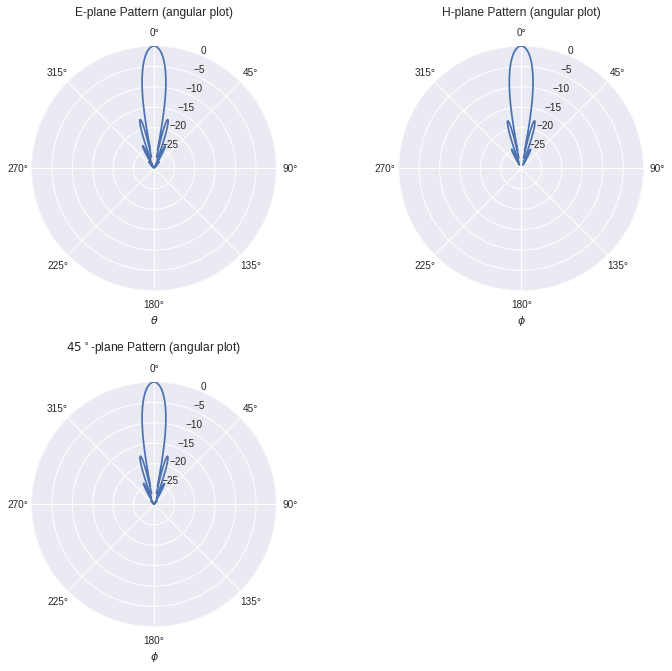

In [0]:
num_pts_theta = 500
theta = np.linspace(-np.pi, np.pi, num_pts_theta)
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
P_norm = P_n(theta, np.pi/2)
P_norm[np.isnan(P_norm)] = 1 
if scale == 'lin':
    ax.plot(theta, (P_norm))
else:
    ax.plot(theta, 10*np.log10(P_norm))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
P_norm = P_n(theta, 0)
P_norm[np.isnan(P_norm)] = 1 
if scale == 'lin':
    ax.plot(theta, (P_norm))
else:
    ax.plot(theta, 10*np.log10(P_norm))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
P_norm = P_n(theta, np.pi/4)
P_norm[np.isnan(P_norm)] = 1 
if scale == 'lin':
    ax.plot(theta, (P_norm))
else:
    ax.plot(theta, 10*np.log10(P_norm))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'$45^\circ$-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

In [0]:
# directivity
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi/2)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  0.03
directivity =  364.06
directivity (dB) =  25.61


## Problem 5

In [0]:
num_pts_theta = 200
num_pts_phi = 200
theta, phi = np.linspace(0, np.pi, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)

In [0]:
def AF_un(theta, phi):
    return np.abs(np.cos(np.sin(theta)*np.cos(phi)))

AF_unnorm = AF_un(theta2d, phi2d)
AF_unnorm[np.isnan(AF_unnorm)] = 0.5  
AF_un_max = AF_unnorm.max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

def EF_un(theta, phi):
    return np.abs(np.sqrt(np.cos(phi)**2+(np.cos(theta)*np.sin(phi))**2))
  
EF_un_max = EF_un(theta2d, phi2d).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max

def P_un(theta, phi):
    return (AF_un(theta, phi)*EF_un(theta,phi))**2
  
P_unnorm = P_un(theta2d, phi2d)
P_unnorm[np.isnan(P_unnorm)] = 0.25  
P_un_max = P_unnorm.max()

def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

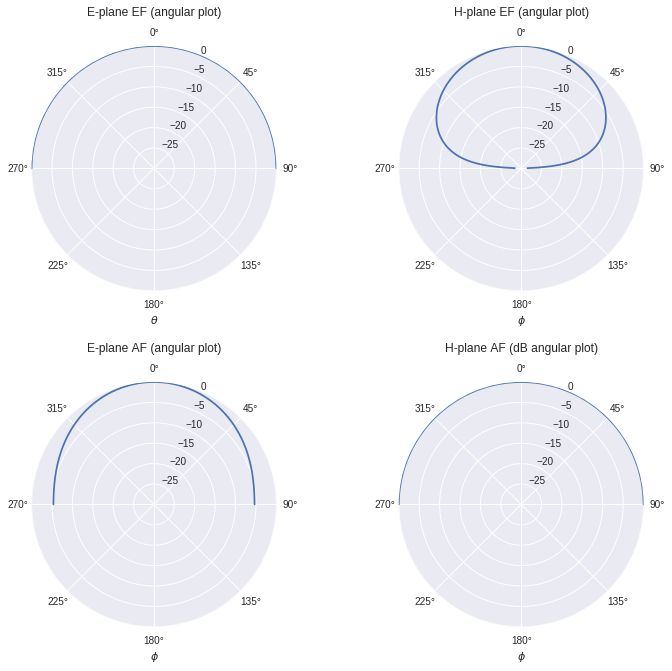

In [0]:
scale = 'dB'
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
AF_norm = AF_n(theta, 0)
AF_norm[np.isnan(AF_norm)] = 1  
if scale == 'lin':
    ax.plot(theta, (AF_norm))
else:
    ax.plot(theta, 20*np.log10(AF_norm))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane AF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
AF_norm = AF_n(theta, np.pi/2)
AF_norm[np.isnan(AF_norm)] = 1
if scale == 'lin':
    ax.plot(theta, (AF_norm))
else:
    ax.plot(theta, 20*np.log10(AF_norm))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane AF (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

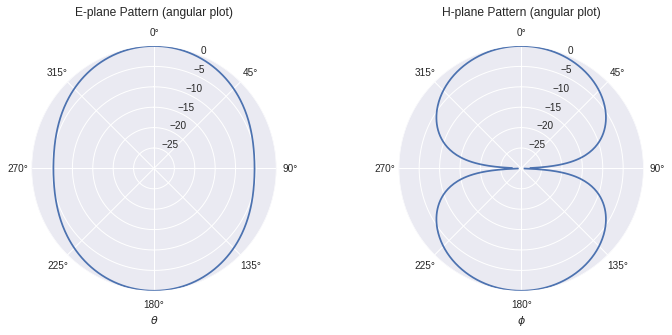

In [0]:
num_pts_theta = 500
theta = np.linspace(-np.pi, np.pi, num_pts_theta)
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
P_norm = P_n(theta, 0)
P_norm[np.isnan(P_norm)] = 1 
if scale == 'lin':
    ax.plot(theta, (P_norm))
else:
    ax.plot(theta, 10*np.log10(P_norm))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
P_norm = P_n(theta, np.pi/2)
P_norm[np.isnan(P_norm)] = 1 
if scale == 'lin':
    ax.plot(theta, (P_norm))
else:
    ax.plot(theta, 10*np.log10(P_norm))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

## Problem 6

### Part a and b

In [0]:
L = 6 # *wvlen in air
a = 3 # *wvlen in air
k = 2*np.pi # /wvlen in air

num_pts_theta = 200
num_pts_phi = 200
theta, phi = np.linspace(0, np.pi, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)

rectangular aperture

In [0]:
def AF_un(theta, phi):
    psix = k*L*np.sin(theta)*np.cos(phi)
    psiy = k*L*np.sin(theta)*np.sin(phi)
    AFx = np.sinc(0.5*psix/np.pi)
    AFy = np.sinc(0.5*psiy/np.pi)
    return np.abs(AFx*AFy)
  
AF_un_max = AF_un(theta2d, phi2d).max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

def EF_un(theta, phi):
    return np.abs(np.sqrt(np.sin(phi)**2+(np.cos(theta)*np.cos(phi))**2))
  
EF_un_max = EF_un(theta2d, phi2d).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max

def P_un(theta, phi):
    return (AF_un(theta, phi)*EF_un(theta,phi))**2
  
P_un_max = P_un(theta2d, phi2d).max()

def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

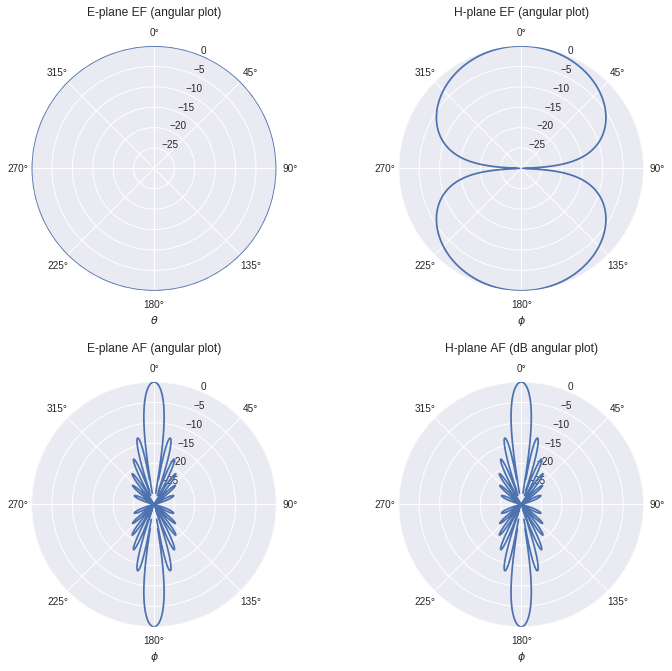

In [0]:
scale = 'dB'
num_pts_theta = 1000
theta = np.linspace(-np.pi, np.pi, num_pts_theta)

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane AF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane AF (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

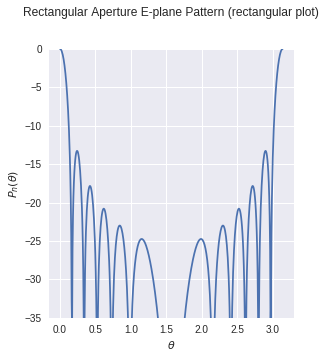

In [0]:
num_pts_theta = 500
theta = np.linspace(0, np.pi, num_pts_theta)
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/2)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
    ax.set_ylim(-35, 0)
ax.set_title(r'Rectangular Aperture E-plane Pattern (rectangular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$P_n(\theta)$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

In [0]:
R = 10*np.log10(P_n(theta2d, phi2d))
limit = -35
R[R<limit] = limit
R = R-limit
X = R*np.sin(theta2d)*np.cos(phi2d)
Y = R*np.sin(theta2d)*np.sin(phi2d)
Z = R*np.cos(theta2d)

In [0]:
norm=matplotlib.colors.SymLogNorm(1,vmin=R.min(),vmax=R.max())
colors=plt.cm.jet(norm(R)) # could use another colormap

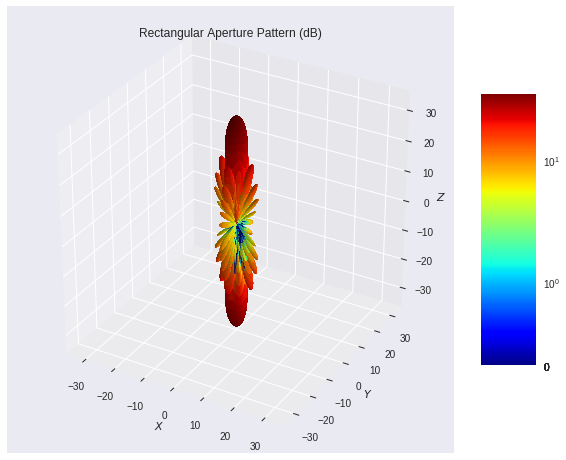

In [0]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.5, facecolors=colors, linewidth=0, antialiased=False)

# set equal aspect ratio
ax.set_aspect('equal')
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# set colorbar according to pattern
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm) # could use another colormap
sm.set_array(R-limit)
fig.colorbar(sm, shrink=0.5, aspect=5)

ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.set_zlabel(r'$Z$')
ax.set_title('Rectangular Aperture Pattern (dB)')
plt.show()

In [0]:
# directivity
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi/2)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  0.03
directivity =  465.6
directivity (dB) =  26.68


In [0]:
# HPBW in E-plane
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)
ind1_E = np.where(10*np.log10(P_n(theta, np.pi/2))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n(theta, np.pi/2))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

E-plane 3dB beamwidth =  8.3


In [0]:
# peaks and nulls
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)
max_ind = argrelextrema(P_n(theta,0), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(P_n(angles,0)))

min_ind = argrelextrema(P_n(theta,0), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

angles of local maxima (deg) =  [ 0.18036072 13.88777555 23.98797595 35.17034068 47.79559118 64.38877756]
corresponding levels (dB) =  [ -0.00514049 -13.52327512 -18.63183465 -22.5484983  -26.48759934
 -32.24084287]
angles of nulls (deg) =  [ 9.55911824 19.29859719 30.12024048 41.66332665 56.45290581]


In [0]:
# peaks and nulls in the 45 deg-plane
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)
max_ind = argrelextrema(P_n(theta,np.pi/4), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(P_n(angles,np.pi/4)))

min_ind = argrelextrema(P_n(theta,np.pi/4), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

angles of local maxima (deg) =  [ 0.18036072 19.65931864 35.53106212 54.6492986 ]
corresponding levels (dB) =  [ -0.00511867 -26.77667141 -36.46780805 -43.34210036]
angles of nulls (deg) =  [13.52705411 27.95591182 44.90981964 70.52104208]


In [0]:
# circular aperture
def AF_un(theta, phi):
    psir = k*a*np.sin(theta)
    return np.abs(special.jv(1,psir)/psir)

AF_unnorm = AF_un(theta2d, phi2d)
AF_unnorm[np.isnan(AF_unnorm)] = 0.5  
AF_un_max = AF_unnorm.max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

def EF_un(theta, phi):
    return np.abs(np.sqrt(np.sin(phi)**2+(np.cos(theta)*np.cos(phi))**2))
  
EF_un_max = EF_un(theta2d, phi2d).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max

def P_un(theta, phi):
    return (AF_un(theta, phi)*EF_un(theta,phi))**2
  
P_unnorm = P_un(theta2d, phi2d)
P_unnorm[np.isnan(P_unnorm)] = 0.25  
P_un_max = P_unnorm.max()

def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


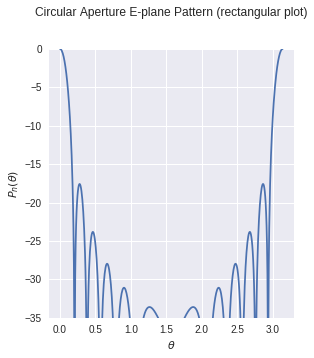

In [0]:
num_pts_theta = 500
theta = np.linspace(0, np.pi, num_pts_theta)
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221)
P_norm = P_n(theta, np.pi/2)
P_norm[np.isnan(P_norm)] = 1 
if scale == 'lin':
    ax.plot(theta, (P_norm))
else:
    ax.plot(theta, 10*np.log10(P_norm))
    ax.set_ylim(-35, 0)
ax.set_title(r'Circular Aperture E-plane Pattern (rectangular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$P_n(\theta)$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

In [0]:
R = 10*np.log10(P_n(theta2d, phi2d))
R[np.isnan(R)] = 0 
limit = -35
R[R<limit] = limit
R = R-limit
X = R*np.sin(theta2d)*np.cos(phi2d)
Y = R*np.sin(theta2d)*np.sin(phi2d)
Z = R*np.cos(theta2d)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
norm=matplotlib.colors.SymLogNorm(1,vmin=R.min(),vmax=R.max())
colors=plt.cm.jet(norm(R)) # could use another colormap

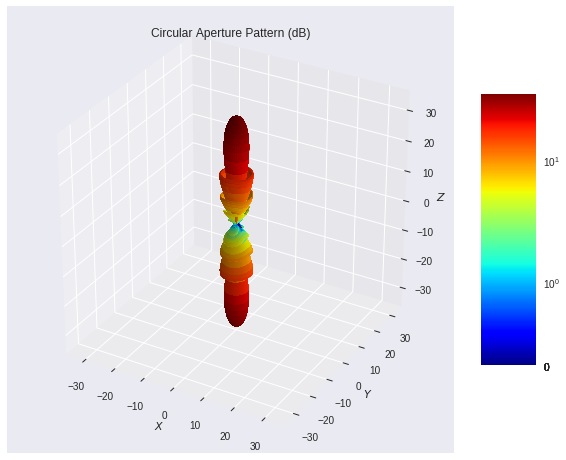

In [0]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.5, facecolors=colors, linewidth=0, antialiased=False)

# set equal aspect ratio
ax.set_aspect('equal')
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# set colorbar according to pattern
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm) # could use another colormap
sm.set_array(R-limit)
fig.colorbar(sm, shrink=0.5, aspect=5)

ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.set_zlabel(r'$Z$')
ax.set_title('Circular Aperture Pattern (dB)')
plt.show()

In [0]:
# directivity
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi/2)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  0.03
directivity =  364.06
directivity (dB) =  25.61


In [0]:
# HPBW in E-plane
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)
ind1_E = np.where(10*np.log10(P_n(theta, np.pi/2))>-3)[0][0]
ind2_E = np.where(10*np.log10(P_n(theta, np.pi/2))>-3)[0][-1]
BW_3dB_E = (theta[ind2_E] - theta[ind1_E])/np.pi*180 # degrees
print('E-plane 3dB beamwidth = ', round(BW_3dB_E,2))

E-plane 3dB beamwidth =  9.74


In [0]:
# peaks and nulls in the E-plane
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)
max_ind = argrelextrema(P_n(theta,0), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(P_n(angles,0)))

min_ind = argrelextrema(P_n(theta,0), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

angles of local maxima (deg) =  [15.69138277 26.51302605 37.69539078 51.04208417 69.07815631]
corresponding levels (dB) =  [-17.90624222 -24.77635364 -30.02931447 -35.19682251 -43.10370732]
angles of nulls (deg) =  [11.72344689 21.82364729 32.64529058 44.90981964 60.78156313]


In [0]:
# peaks and nulls in the 45 deg-plane
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)
max_ind = argrelextrema(P_n(theta,np.pi/4), np.greater)[0]
angles = theta[max_ind]
angles = angles[angles>=0]
print('angles of local maxima (deg) = ', angles/np.pi*180)
print('corresponding levels (dB) = ', 10*np.log10(P_n(angles,np.pi/4)))

min_ind = argrelextrema(P_n(theta,np.pi/4), np.less)[0]
angles = theta[min_ind]
angles = angles[angles>=0]
print('angles of nulls (deg) = ', angles/np.pi*180)

angles of local maxima (deg) =  [15.69138277 26.51302605 38.05611222 51.40280561 71.96392786]
corresponding levels (dB) =  [-17.73816674 -24.26701628 -28.87219197 -32.68277741 -36.21347155]
angles of nulls (deg) =  [11.72344689 21.82364729 32.64529058 44.90981964 60.78156313]
